In [1]:
import h5py
import sys
from scipy import constants as sp
import os
import datetime
from dateutil import parser
from matplotlib import pyplot as plt
from numba import njit, prange

sys.path.append('..')

from solver import solver
from analyzer import analyzer
from integrators import relativistic_boris
from plot import plot_field
from utils import field_line, Re, inv_Re, b_along_path

from fields import *
from distributions import *

In [2]:
@njit
def L(t):
    return 5000e3
    #return (500e3 - 5000e3) / (600 - 0) * (t - 0) + 5000e3

In [3]:
b0x = 1e-9
b0z = 1e-9

b_field = evolving_harris_cs_model(b0x, b0z, L, lambd=40)
e_field = zero_field() # evolving_harris_induced_E(b0x, L, 1e-4)

In [4]:
s = solver(e_field, b_field)

In [5]:
s.populate(10,
           delta(np.array([0., 0., 0.])),
           delta(5e5),
           delta(np.radians(20)),
           uniform(0, 2 * np.pi)
          )

100%|██████████| 10/10 [00:02<00:00,  4.14it/s]


In [6]:
s.solve(10, 1e-4, 1e-3)

100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


In [7]:
s.save('harris')

harris already exists. Overwrite? (Y/N) Y
Saved file harris.hdf5 containing 5.05 megabytes of information.


In [8]:
a = analyzer('harris')

Loaded file harris.hdf5 containing 5.05 megabytes of information.


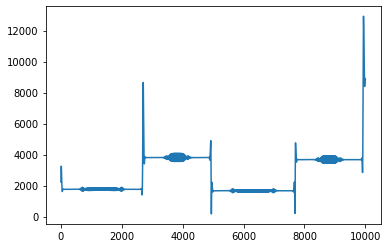

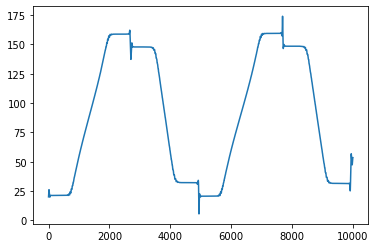

In [9]:
plt.plot(a.moment()[5, :])
plt.show()
plt.plot(np.degrees(a.pitch_ang()[5, :]))

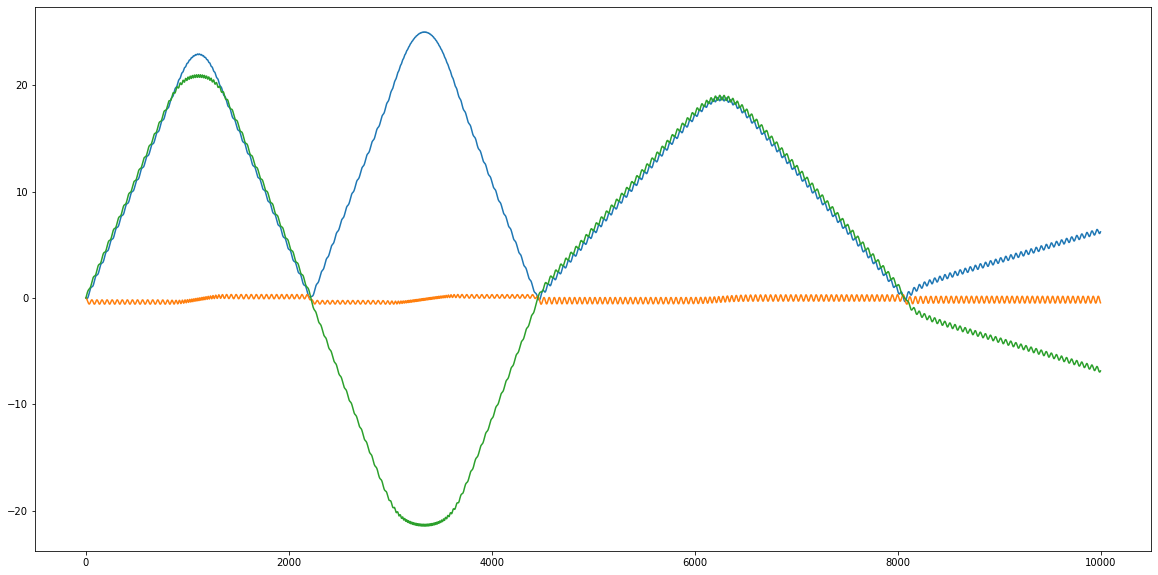

In [10]:
plt.figure(figsize=(20, 10))
rr = a.position()[0, :]
plt.plot(rr[:, 0] / Re)
plt.plot(rr[:, 1] / Re)
plt.plot(rr[:, 2] / Re)

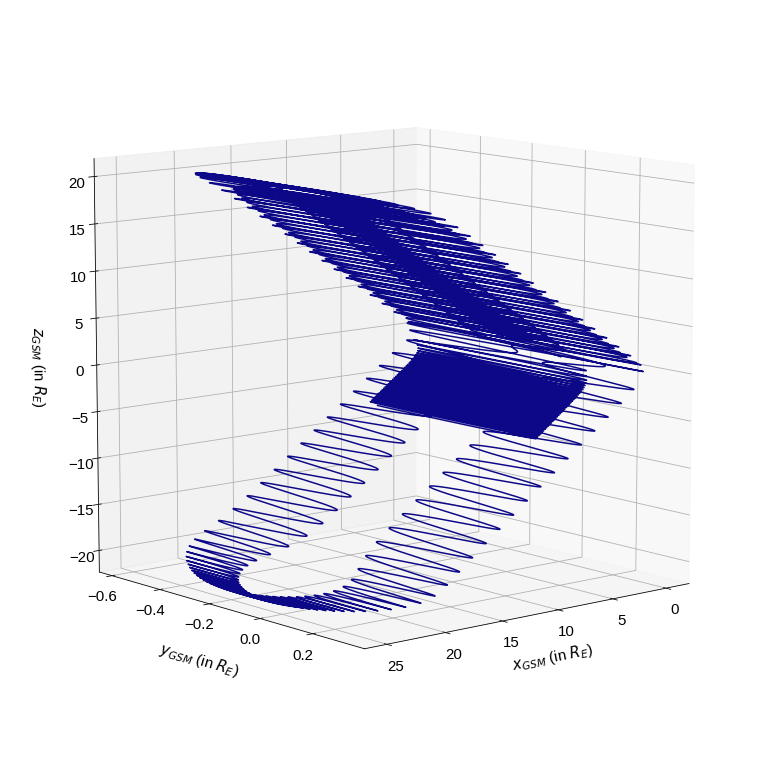

In [11]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'Liberation Sans'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

col = plt.cm.plasma(np.linspace(0, 0.7, 4))

for p, i in enumerate([0]):
    pos = a.position()[i, :]
    ax.plot(pos[:, 0] / Re, pos[:, 1] / Re, pos[:, 2] / Re, color=col[i])

ax.set_xlabel('\n$x_{GSM}$ (in $R_E$)', linespacing=1.5)
ax.set_ylabel('\n$y_{GSM}$ (in $R_E$)', linespacing=3)
ax.set_zlabel('\n$z_{GSM}$ (in $R_E$)', linespacing=3)

ax.view_init(10, 50)

plt.grid()
plt.tight_layout(pad=-1)
plt.show()

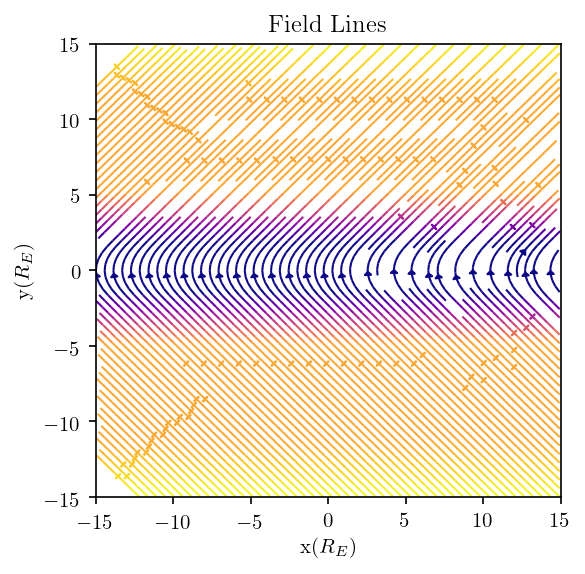

In [4]:
from plot import format_plots

format_plots()
plot_field(b_field, np.array([1., 0., 0]), np.array([0., 0., 1.]), [-15, 15], [-15, 15], size=4, nodes=10, title='Field Lines')

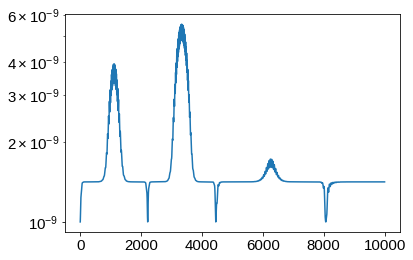

In [15]:
plt.semilogy(a.b_mag()[0, :])